**LIBRARIES**

In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics

**DATA**

In [45]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data (1).csv


In [70]:
DATA = pd.read_csv('data.csv')
DATA

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


**PREPROCESSING DATA**

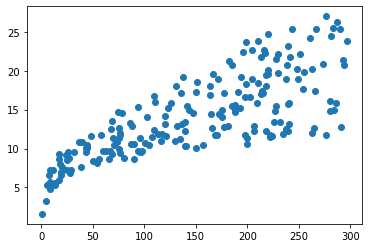

In [71]:
X = DATA.iloc[:, 1].values
Y = DATA.iloc[:, 4].values
plt.scatter(X, Y)
plt.show()

**BUILDING MODEL**

In [72]:
m = 0
c = 0
L = 0.0001
epochs = 50
n = float(len(X))
for i in range(epochs):
    ypred = m*X + c
    dm = (-2/n) * sum(X * (Y - ypred))
    dc = (-2/n) * sum(X - ypred)
    m = m - L * dm
    c = c - L * dc
print (m, c)

-8.770337342917154e+32 -4.453798118182081e+30


**MAKING PREDICTION**

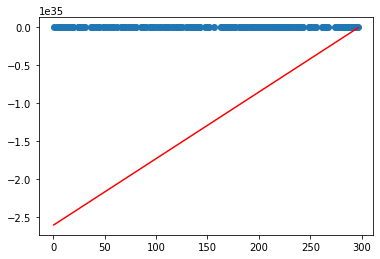

In [73]:
ypred = m*X + c
plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(ypred), max(ypred)], color='red') #regression line
plt.show()

**LINEAR MODEL USING SKLEARN**

In [74]:
lm1 = smf.ols(formula='Y ~ X', data=DATA).fit()
lm1.params

Intercept    7.032594
X            0.047537
dtype: float64

In [77]:
feature = ['TV']
X = DATA[feature]
Y = DATA.Sales
lm2 = LinearRegression()
lm2.fit(X, Y)

print(lm2.intercept_)
print(lm2.coef_)

7.032593549127695
[0.04753664]


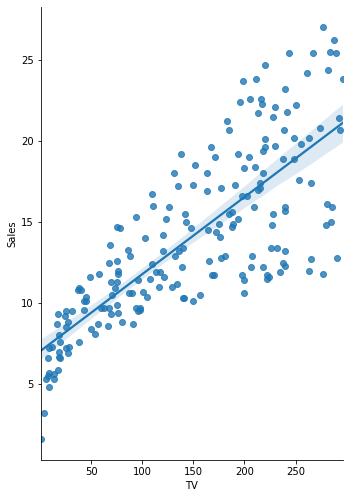

In [78]:
sns.pairplot(DATA, x_vars=['TV'], y_vars='Sales', height=7, aspect=0.7, kind='reg')

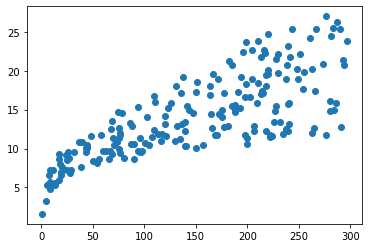

In [79]:
x = DATA['TV'] 
y = DATA['Sales']
plt.scatter(x, y)
plt.show()

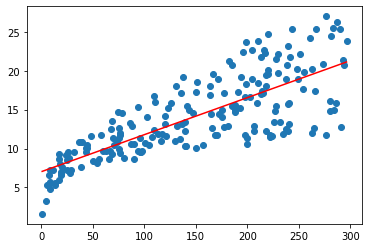

In [80]:
y_predx = lm2.coef_*x +  lm2.intercept_
plt.scatter(x, y) 
plt.plot([min(x), max(x)], [min(y_predx), max(y_predx)], color='red')
plt.show()